<a href="https://colab.research.google.com/github/Raziel-JKM/Final-Team1/blob/main/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6장 – 결정 트리**

In [ ]:
from collections import deque

def printer_queue(priorities, location):
    queue = deque([(p, i) for i, p in enumerate(priorities)])
    count = 0

    while queue:
        current = queue.popleft()  # 왼쪽에서 빼기 (dequeue)

        if any(current[0] < q[0] for q in queue):
            queue.append(current)  # 오른쪽에 추가 (enqueue)
        else:
            count += 1
            if current[1] == location:
                return count

    return -1

In [ ]:

# 테스트
print(printer_queue([2, 1, 3, 2], 2))  # 1
print(printer_queue([1, 1, 9, 1, 1, 1], 0))  # 5

1
5


In [ ]:
def printer_queue(priorities, location):
    """
    priorities: 각 작업의 우선순위 리스트
    location: 확인하고 싶은 작업의 인덱스
    반환: 해당 작업이 몇 번째로 인쇄되는지 (1부터 시작)
    """
    # (우선순위, 원래_인덱스) 형태로 큐 생성
    queue = [(p, i) for i, p in enumerate(priorities)]

    # 인쇄된 작업 수
    count = 0

    # 큐가 빌 때까지 반복
    while queue:
        # 현재 작업 가져오기
        current = queue.pop(0)

        # 현재 작업보다 우선순위가 높은 작업이 있는지 확인
        if any(current[0] < q[0] for q in queue):
            # 우선순위가 높은 작업이 있으면 현재 작업을 큐의 맨 뒤로 이동
            queue.append(current)
        else:
            # 우선순위가 가장 높으면 인쇄하고 카운트 증가
            count += 1

            # 현재 작업이 우리가 찾던 작업인지 확인
            if current[1] == location:
                return count

    # 이 부분은 실행되지 않아야 함 (큐에서 해당 작업을 반드시 찾아야 함)
    return -1

# 테스트
print(printer_queue([2, 1, 3, 2], 2))  # 1
print(printer_queue([1, 1, 9, 1, 1, 1], 0))  # 5

1
5


In [ ]:
import numpy as np

In [ ]:
normal_samples = np.random.normal(loc=10, scale=2, size=100) # 평균, 표준편차, 샘플 개수
print(f"\n4. 정규 분포 샘플 (처음 5개): {normal_samples[:5].round(2)}")
print(f"   - 샘플 평균: {normal_samples.mean():.2f}")
print(f"   - 샘플 표준편차: {normal_samples.std():.2f}")


4. 정규 분포 샘플 (처음 5개): [12.55 14.53 11.18 10.43 13.72]
   - 샘플 평균: 10.20
   - 샘플 표준편차: 2.16


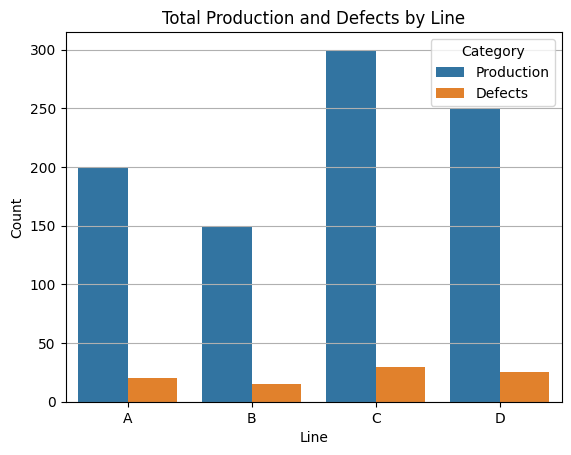

_이 노트북에는 6장의 연습 문제에 대한 모든 샘플 코드와 솔루션이 포함되어 있습니다._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/06_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 설정

이 프로젝트에는 파이썬 3.7 이상이 필요합니다:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

또한 사이킷런 ≥ 1.0.1이 필요합니다:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

이전 챕터에서와 마찬가지로 기본 글꼴 크기를 정의하여 그림을 더 예쁘게 만들어 보겠습니다:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

그리고 `images/decision_trees` 폴더를 만들고(아직 존재하지 않는 경우), 이 노트북을 통해 책에 사용할 그림을 고해상도로 저장하는 데 사용되는 `save_fig()` 함수를 정의해 보겠습니다:

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 결정 트리 훈련과 시각화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

**이 코드 예제는 그림 6-1 붓꽃 결정 트리를 생성합니다:**

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"),  # 경로가 책과 다릅니다.
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

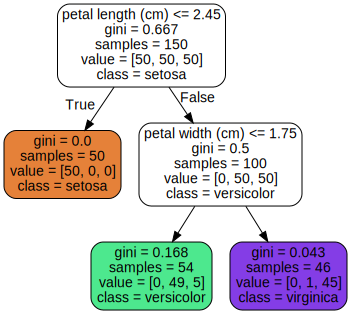

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")  # 경로가 책과 다릅니다.

Graphviz는 `.dot` 파일을 다양한 포맷으로 변환할 수 있는 `dot` 명령줄 도구도 제공합니다. 다음 명령은 dot 파일을 png 이미지로 변환합니다:

In [ ]:
# 추가 코드
!dot -Tpng {IMAGES_PATH / "iris_tree.dot"} -o {IMAGES_PATH / "iris_tree.png"}

# 예측하기

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# 기본 데이터 및 모델 설정
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# 모델 예측 및 결정 경계 시각화 준비
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
custom_cmap = ['#fafab0', '#9898ff', '#a0faa0']

# 결정 경계 시각화
decision_boundary_fig = go.Figure()

decision_boundary_fig.add_trace(
    go.Contour(
        x=np.linspace(0, 7.2, 100),
        y=np.linspace(0, 3, 100),
        z=y_pred,
        colorscale=custom_cmap,
        opacity=0.3,
        showscale=False
    )
)

# 샘플 데이터 포인트 시각화
for idx, (name, marker_symbol) in enumerate(zip(iris.target_names, ['circle', 'square', 'triangle-up'])):
    target_data = X_iris[y_iris == idx]
    decision_boundary_fig.add_trace(
        go.Scatter(
            x=target_data[:, 0], y=target_data[:, 1],
            mode='markers',
            name=f'Iris {name}',
            marker=dict(symbol=marker_symbol, size=10)
        )
    )

# 결정 트리의 깊이 시각화
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
decision_boundary_fig.add_shape(type="line", x0=th0, x1=th0, y0=0, y1=3,
                                line=dict(color="Black", width=2))
decision_boundary_fig.add_shape(type="line", x0=th0, x1=7.2, y0=th1, y1=th1,
                                line=dict(color="Black", dash="dash", width=2))
decision_boundary_fig.add_shape(type="line", x0=th2a, x1=th2a, y0=0, y1=th1,
                                line=dict(color="Black", dash="dot", width=2))
decision_boundary_fig.add_shape(type="line", x0=th2b, x1=th2b, y0=th1, y1=3,
                                line=dict(color="Black", dash="dot", width=2))

# 레이아웃 설정 및 그래프 표시
decision_boundary_fig.update_layout(
    title="Decision Tree Decision Boundaries",
    xaxis_title="Petal length (cm)",
    yaxis_title="Petal width (cm)",
    legend_title="Iris Species",
    width=800,
    height=600
)

# 그래프 표시
decision_boundary_fig.show()

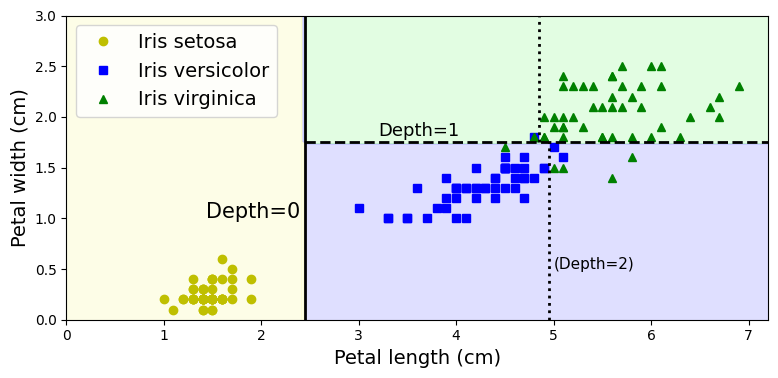

트리 구조는 `tree_` 속성을 통해 액세스할 수 있습니다:

In [ ]:
tree_clf.tree_

자세한 내용은 이 클래스의 문서를 확인하세요:

In [ ]:
# help(sklearn.tree._tree.Tree)

예시로 아래의 추가 자료 섹션을 참조하세요.

# 클래스 확률 추정

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

# 규제 매개변수

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

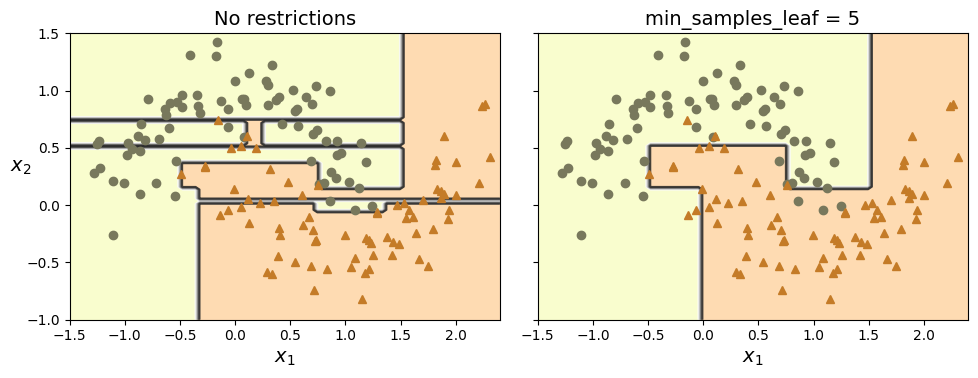

In [ ]:
# 추가 코드 - 이 셀은 그림 6-3을 생성하고 저장합니다.

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [ ]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

# 회귀

간단한 2차방정식 훈련 세트를 준비해 보겠습니다:

**코드 샘플:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # 간단한 랜덤한 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

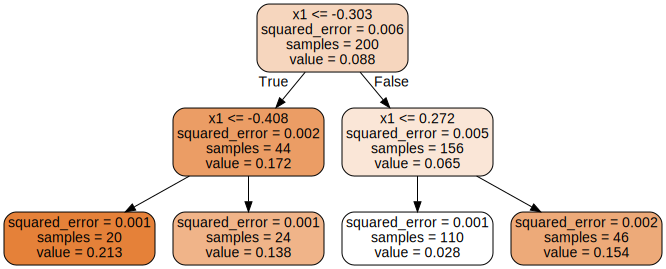

In [ ]:
# 추가 코드 - export_graphviz()를 사용하는 방법을 이미 살펴봤습니다.
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [ ]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [ ]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

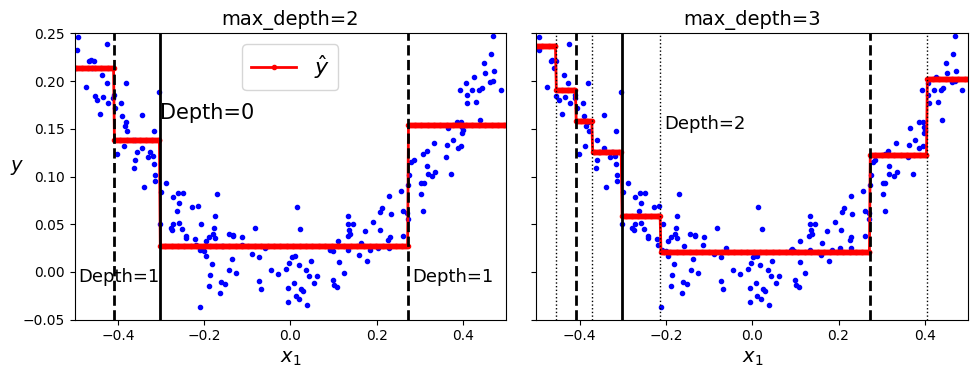

In [ ]:
# 추가 코드 - 이 셀은 그림 6-5를 생성하고 저장합니다.

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

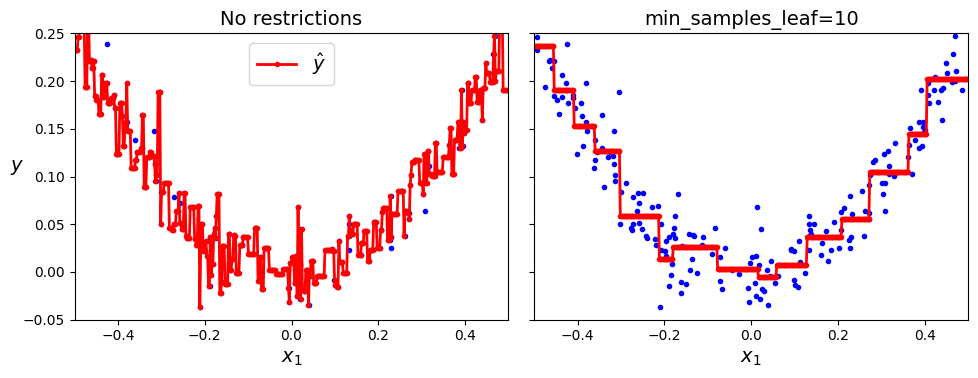

In [ ]:
# 추가 코드 - 이 셀은 그림 6-6을 생성하고 저장합니다.

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

# 축 방향에 대한 민감성

데이터셋을 회전하면 결정 경계가 완전히 달라집니다:

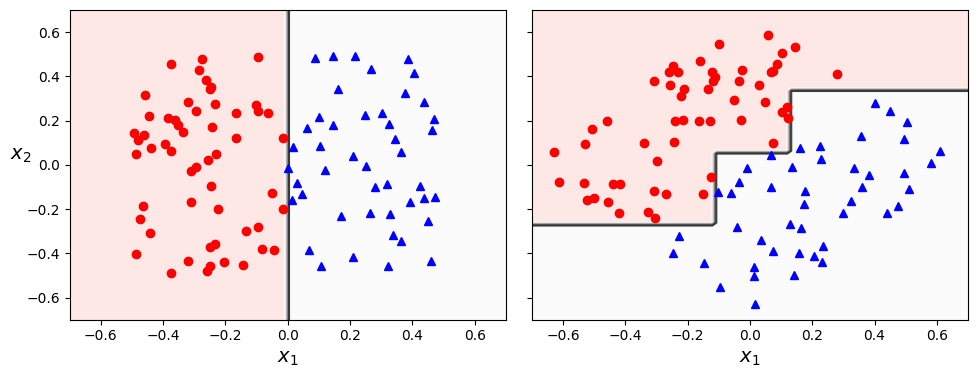

In [ ]:
# 추가 코드 - 이 셀은 그림 6-7을 생성하고 저장합니다.

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 도
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

ValueError: ['#fafab0', '#9898ff', '#a0faa0'] is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

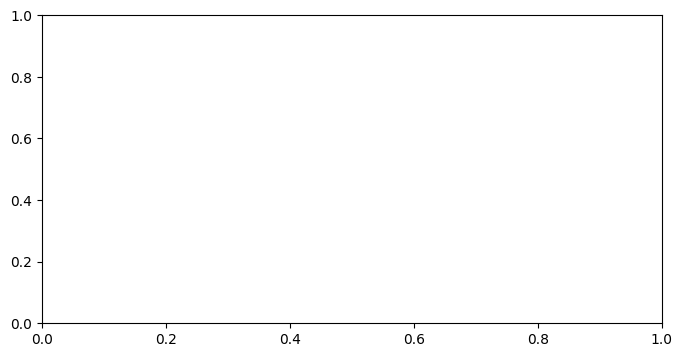

In [ ]:
# 추가 코드 - 이 셀은 그림 6-8을 생성하고 저장합니다.

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

# 결정 트리의 분산 문제

데이터셋의 작은 변화(예를 들면, 회전)로 인해 매우 다른 결정 트리가 생성될 수 있음을 살펴보았습니다. 사이킷런에서 사용하는 CART 학습 알고리즘은 확률적이기 때문에 동일한 데이터에 대해 동일한 모델을 학습하더라도 매번 매우 다른 모델이 생성될 수 있습니다. 이를 보여주기 위해 `random_state`를 이전과 다른 값으로 설정하겠습니다:

In [ ]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

In [ ]:
# 추가 코드 - 이 셀은 그림 6-9를 생성하고 저장합니다.

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

# 추가 자료 - 트리 구조에 액세스

훈련된 `DecisionTreeClassifier`에는 트리의 구조를 저장하는 `tree_` 속성이 있습니다:

In [ ]:
tree = tree_clf.tree_
tree

트리에 있는 총 노드 수를 얻을 수 있습니다:

In [ ]:
tree.node_count

그 외 설명이 필요 없는 다른 속성이 있습니다:

In [ ]:
tree.max_depth

In [ ]:
tree.max_n_classes

In [ ]:
tree.n_features

In [ ]:
tree.n_outputs

In [ ]:
tree.n_leaves

노드에 대한 모든 정보는 넘파이 배열에 저장됩니다. 예를 들어, 각 노드의 불순도는 다음과 같습니다:

In [ ]:
tree.impurity

루트 노드의 인덱스는 0입니다. 노드 _i_의 왼쪽 및 오른쪽 자식 노드는 `tree.children_left[i]` 및 `tree.children_right[i]`입니다. 예를 들어 루트 노드의 자식 노드는 다음과 같습니다:

In [ ]:
tree.children_left[0], tree.children_right[0]

왼쪽 노드와 오른쪽 노드가 같으면 이것이 리프 노드임을 의미합니다(자식 노드 ID는 임의적임):

In [ ]:
tree.children_left[3], tree.children_right[3]

따라서 다음과 같이 리프 노드 ID를 얻을 수 있습니다:

In [ ]:
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

리프 노드가 아닌 노드를 _분할 노드_라고 합니다. 분할 특성은 `feature` 배열을 통해 참조할 수 있습니다. 리프 노드에 대한 값은 무시해야 합니다:

In [ ]:
tree.feature

그리고 해당 임계값은 다음과 같습니다:

In [ ]:
tree.threshold

또한 각 노드에 도달한 클래스당 인스턴스 수도 확인할 수 있습니다:

In [ ]:
tree.value

In [ ]:
tree.n_node_samples

In [ ]:
np.all(tree.value.sum(axis=(1, 2)) == tree.n_node_samples)

각 노드의 깊이를 계산하는 방법은 다음과 같습니다:

In [ ]:
def compute_depth(tree_clf):
    tree = tree_clf.tree_
    depth = np.zeros(tree.node_count)
    stack = [(0, 0)]
    while stack:
        node, node_depth = stack.pop()
        depth[node] = node_depth
        if tree.children_left[node] != tree.children_right[node]:
            stack.append((tree.children_left[node], node_depth + 1))
            stack.append((tree.children_right[node], node_depth + 1))
    return depth

depth = compute_depth(tree_clf)
depth

다음은 깊이 1에서 모든 분할 노드의 임계값을 구하는 방법입니다:

In [ ]:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

In [ ]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

# 연습문제 해답

## 1. to 6.

부록 A 참조

## 7.

_문제: moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요._

a. `make_moons(n_samples=10000, noise=0.4)`를 사용해 데이터셋을 생성합니다.

`random_state = 42`를 추가하여 이 노트북의 출력을 일정하게 만듭니다:

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. 이를 `train_test_split()`를 사용해 훈련 세트와 테스트 세트로 나눕니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons,
                                                    test_size=0.2,
                                                    random_state=42)

c. `DecisionTreeClassifier`의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다(`GridSearchCV`를 사용하면 됩니다). 힌트: 여러 가지 `max_leaf_nodes` 값을 시도해보세요.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%의 정확도가 나올 것입니다.

기본적으로 `GridSearchCV`는 전체 훈련 세트로 찾은 최적의 모델을 다시 훈련시킵니다(`refit=False`로 지정해서 바꿀 수 있습니다). 그래서 별도로 작업할 필요가 없습니다. 모델의 정확도를 바로 평가할 수 있습니다:

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

## 8.

_문제: 랜덤 포레스트를 만들어보세요._

a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1,000개 생성합니다. 각각은 무작위로 선택된 100개의 샘플을 담고 있습니다. 힌트: 사이킷런의 `ShuffleSplit`을 사용할 수 있습니다.

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1,000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.

In [ ]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 `mode()` 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 _다수결 예측_이 만들어집니다.

In [ ]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [ ]:
from scipy.stats import mode

# scipy 1.11에서 keepdims의 기본값이 False로 바뀝니다.
# 이와 관련된 경고를 피하기 위해 명시적으로 False로 지정합니다.
y_pred_majority_votes, n_votes = mode(Y_pred, axis=0, keepdims=False)

In [ ]:
y_pred_majority_votes.shape, n_votes.shape

d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은(약 0.5~1.5% 정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!

In [ ]:
accuracy_score(y_test, y_pred_majority_votes)